# Imports

In [22]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

On récupére :
- le module `numpy` (*numerical python*) permettant la gestion de grand tableaux de nombres de manière efficace
- le module `matplotlib.pyplot` qui permet d'obtenir un affichage graphique
- la fonction `odeint` (*ordinary differential equation integrator*) 

In [23]:
%matplotlib inline
plt.rc('figure', figsize=(12,9))

# Résolution d'une équation scalaire

On cherche à résoudre l'équation différentielle scalaire :
$$\dot{y}(t)=\sin(t+x),$$
avec la donnée initiale 
$$y(2)=1.$$

In [24]:
def flux(X,t):
    return np.sin(X+t)

In [25]:
initiale=np.array([1.0])  # On notera que même pour une équation scalaire on utilise des tableaux pour l'état
temps=np.arange(2.0, 8.0, 0.05)
resultat=odeint(func=flux, y0=initiale, t=temps)

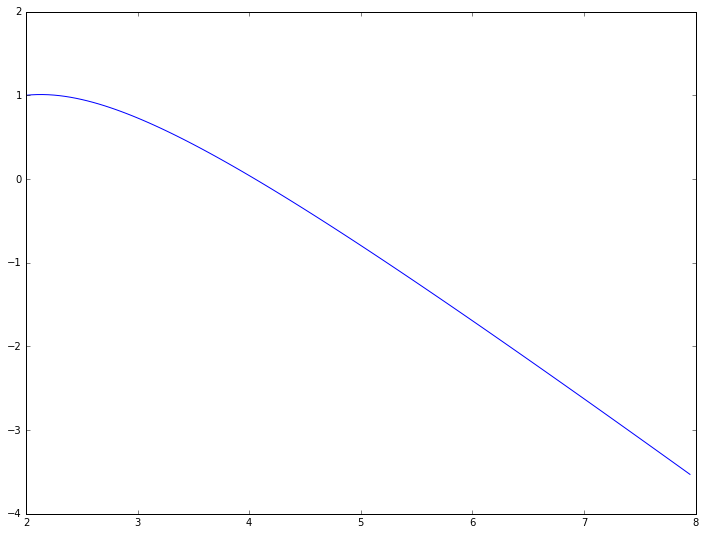

In [26]:
plt.plot(temps, resultat)

# Comment résoudre un système 2x2

On va s'attaquer au système :
$$
\begin{cases}
\dot{x}=x(1-2 y)\\
\dot{y}=y(x-0.5)
\end{cases}
$$
munit de la condition initiale 
$$x(0)=1,\qquad y(0)=\frac{1}{2}.$$

In [27]:
def flux(X, t):  # X est le vecteur d'état, t est le temps qui doit être présent même si il n'y a pas dépendance
    x, y = X
    return (x*(1-2*y), y*(x-0.5))

In [28]:
temps = np.linspace(0.0, 20.0, 401)
initiale = (1.0, 0.5)
resultats = odeint(func=flux, y0=initiale, t=temps)

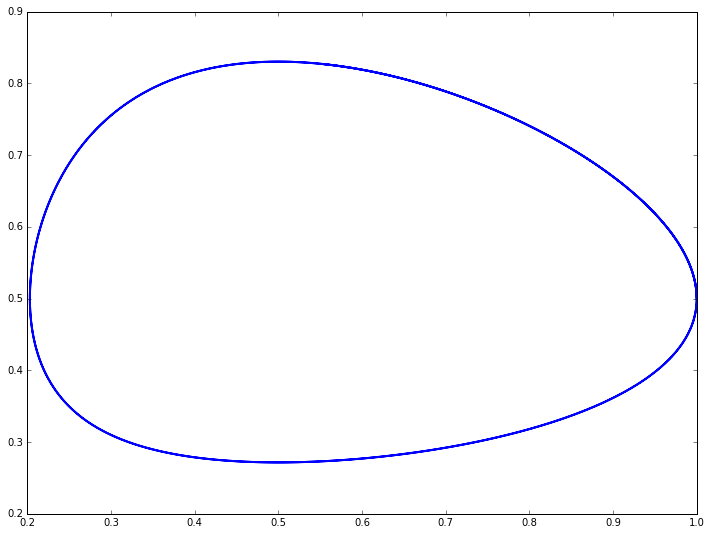

In [29]:
plt.plot(resultats[:,0], resultats[:,1], lw=2.0)

# Système de grande dimension

On va chercher à résoudre l'équation de la chaleur :
$$\partial_t u(t,x)-\partial^2_{xx} u(t,x)=0,\qquad (t,x)\in \mathbb{R}^+\times (0,L),$$
avec la donnée initiale
$$u(0,x)=u_0(x),\qquad x\in (0,L).$$

On va faire une semi-discrétisation en espace on introduit alors pour un entier $n$, la longueur 
$$dx=\frac{L}{n},$$
et les points 
$$x_k=\frac{kL}{n},\qquad \forall k\in\{0,1,...,n-1,n\},$$
et par convention
$$x_{k+\frac{1}{2}}=\frac{x_k+x_{k+1}}{2}.$$
Si on note $u_k(t)=u\left(t,x_{k+\frac{1}{2}}\right)$, on obtient alors le système d'équations différentielles
$$
\begin{cases}
\dot{u^0}(t)=\frac{u^1(t)-2u^0(t)}{dx^2},\\
\dot{u^1}(t)=\frac{u^2(t)+u^0(t)-2u^1(t)}{dx^2},\\
\dot{u^2}(t)=\frac{u^3(t)+u^1(t)-2u^2(t)}{dx^2},\\
\qquad \vdots\\
\dot{u^{n-2}}(t)=\frac{u^{n-1}(t)+u^{n-3}(t)-2u^{n-2}(t)}{dx^2},\\
\dot{u^{n-1}}(t)=\frac{u^{n-2}(t)-2u^{n-1}(t)}{dx^2},
\end{cases}
$$
(On notera que les conditions aux bords de l'EDP sont intégrées dans les premières et dernière équation différentielles du système.

In [35]:
L=2.0
nbPoints=100
dx=L/nbPoints

In [36]:
extremites=np.linspace(0,L, nbPoints+1)
points=(extremites[1:]+extremites[:-1])/2

In [37]:
def flux(U,t):
    retour=np.zeros_like(U)
    retour[1:-1]=(U[:-2]+U[2:]-2*U[1:-1])/dx**2
    return retour

In [39]:
def donneeIni(x):
    return np.sin(2*np.pi*x/L)*x**2

In [40]:
U0=np.zeros(nbPoints+2)
U0[1:-1]=donneeIni(points)

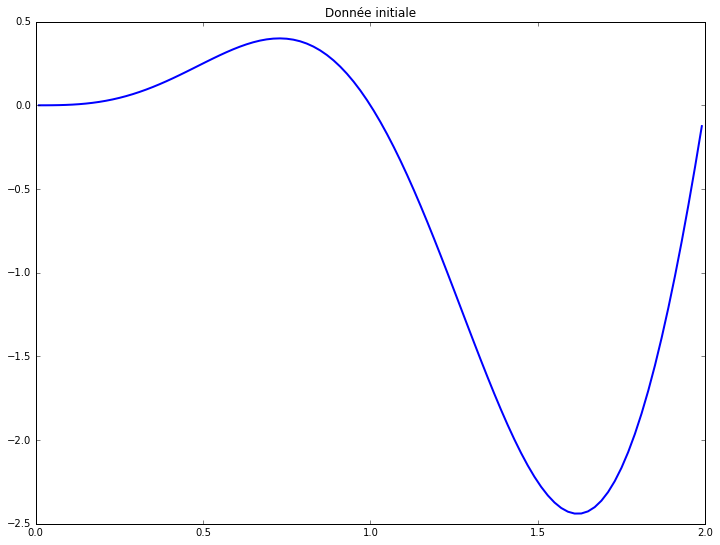

In [43]:
plt.plot(x, U0[1:-1], lw=2)
plt.title("Donnée initiale")

In [61]:
T=0.3
dt=0.01
temps=np.arange(0.0, T, dt)
resultat=odeint(func=flux, y0=U0, t=temps)

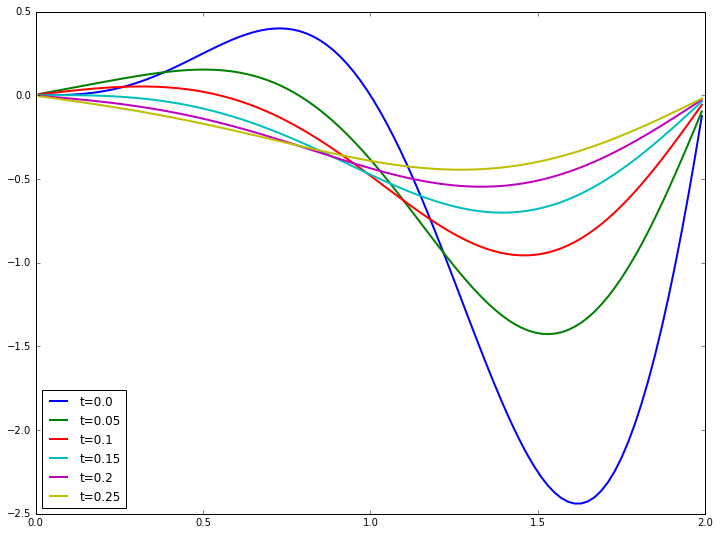

In [62]:
for i in range(len(temps)//5):
    plt.plot(points, resultat[5*i, 1:-1], lw=2.0, label="t={:.2}".format(5*i*dt))
    
plt.legend(loc="best")